In [5]:
pip install selenium

     |████████████████████████████████| 904 kB 1.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install urllib3

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install bs4

     |████████████████████████████████| 115 kB 1.1 MB/s eta 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=9767e6192f9724ade193b6271f58e00f226de663d79dffadc498c3cbab27ae1c
  Stored in directory: /Users/jesuis_monty/Library/Caches/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install lxml

     |████████████████████████████████| 4.6 MB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [449]:
pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11686 sha256=4ec18809f0a71a18e61ff086aa821996c58c408ecb450de66709222d50314932
  Stored in directory: /Users/jesuis_monty/Library/Caches/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import wikipedia
from bs4 import BeautifulSoup
import lxml
import requests


def wiki_scrape(topic): 
    df = pd.DataFrame(columns=['title', 'Paragraph'])
    
    # GET URL: Navigate to the main Topic and extract the list of topics/ articles mentioned in the list
    page = requests.get('https://en.wikipedia.org/wiki/'+ str(topic.replace(' ','_'))) 
    page_content = BeautifulSoup(page.content, 'html.parser')
    tag_list = page_content.find_all('li')
    list_topic = []
    for i in tag_list:
        list_topic.append(i.string)
    list_topic = [i for i in list_topic if i] 
    
    # scrape webpage for every topic in the list_topic
    for i in list_topic:
        page = requests.get('https://en.wikipedia.org/wiki/' + i.replace(' ','_'))
        soup = BeautifulSoup(page.content, 'html.parser')
        tag = soup.find_all('p')
        text = ''
        for paragraph in tag:
            text += paragraph.text
        df = df.append({'title': str(soup.title.string) , 'Paragraph': str(text)}, ignore_index=True)  
            
    return df       

### 

In [2]:
import timeit
start = timeit.default_timer()

data_set = wiki_scrape('Machine Learning')

stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  544.635872333


In [3]:
data_set = data_set[data_set['Paragraph'].str.len()>250].reset_index()
data_set.drop('index', axis=1,inplace = True)
data_set['Paragraph']=data_set['Paragraph'].str.strip()
data_set.drop_duplicates(inplace=True,ignore_index = True)

## Topic Modelling: LDA

In [4]:
data_set

,title,Paragraph
0,Anomaly detection - Wikipedia,"In data analysis, anomaly detection (also outl..."
1,Automated machine learning - Wikipedia,Automated machine learning (AutoML) is the pro...
2,Association rule learning - Wikipedia,Association rule learning is a rule-based mach...
3,Reinforcement learning - Wikipedia,Reinforcement learning (RL) is an area of mach...
4,Structured prediction - Wikipedia,Structured prediction or structured (output) l...
...,...,...
388,Wu Chinese - Wikipedia,"Wu (Chinese character: 吳, Wu: [ŋŋ̍], Mandarin:..."
389,Yue Chinese - Wikipedia,Yue (Cantonese pronunciation: [jyːt̚˧˥]) is a ...
390,Written Chinese - Wikipedia,Written Chinese (Chinese: 中文; pinyin: zhōngwén...
391,Privacy policy - Wikipedia,A privacy policy is a statement or legal docum...


In [1]:
# Load the regular expression library
import re
# Remove punctuation
data_set['processed'] = \
data_set['Paragraph'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data_set['processed'] = \
data_set['processed'].map(lambda x: x.lower())
# Print out the first rows of papers
data_set['processed'].head()

NameError: name 'data_set' is not defined

In [92]:
data_set

,title,Paragraph,processed
0,Anomaly detection - Wikipedia,"In data analysis, anomaly detection (also outl...",in data analysis anomaly detection (also outli...
1,Automated machine learning - Wikipedia,Automated machine learning (AutoML) is the pro...,automated machine learning (automl) is the pro...
2,Association rule learning - Wikipedia,Association rule learning is a rule-based mach...,association rule learning is a rule-based mach...
3,Reinforcement learning - Wikipedia,Reinforcement learning (RL) is an area of mach...,reinforcement learning (rl) is an area of mach...
4,Structured prediction - Wikipedia,Structured prediction or structured (output) l...,structured prediction or structured (output) l...
...,...,...,...
384,Wu Chinese - Wikipedia,"Wu (Chinese character: 吳, Wu: [ŋŋ̍], Mandarin:...",wu (chinese character: 吳 wu: [ŋŋ̍] mandarin: [...
385,Yue Chinese - Wikipedia,Yue (Cantonese pronunciation: [jyːt̚˧˥]) is a ...,yue (cantonese pronunciation: [jyːt̚˧˥]) is a ...
386,Written Chinese - Wikipedia,Written Chinese (Chinese: 中文; pinyin: zhōngwén...,written chinese (chinese: 中文; pinyin: zhōngwén...
387,Privacy policy - Wikipedia,A privacy policy is a statement or legal docum...,a privacy policy is a statement or legal docum...


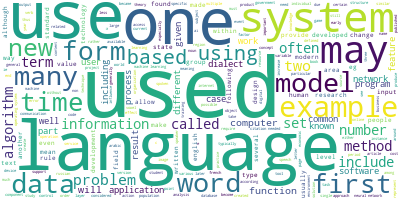

In [93]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data_set['processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [54]:
pip install gensim

     |████████████████████████████████| 23.9 MB 371 kB/s eta 0:00:01     |███████████████████████▏        | 17.3 MB 246 kB/s eta 0:00:27
     |████████████████████████████████| 56 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install nltk

     |████████████████████████████████| 1.4 MB 792 kB/s eta 0:00:01
     |████████████████████████████████| 82 kB 241 kB/s eta 0:00:01
     |████████████████████████████████| 284 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 1.3 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434676 sha256=5d1e01c00b79dd5f0577cf082478f76f35d8435fd66a4a638d079581e03576c0
  Stored in directory: /Users/jesuis_monty/Library/Caches/pip/wheels/ff/d5/7b/f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [94]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

nltk.download('wordnet')

'''
Write a function to perform the pre processing steps on the entire dataset
'''
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jesuis_monty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [122]:
stemmer = SnowballStemmer("english")
processed_docs = []
for doc in data_set.processed:
    processed_docs.append(preprocess(doc))

In [123]:
'''
Create a dictionary from 'processed_docs' containing the number of times a word appears 
in the training set using gensim.corpora.Dictionary and call it 'dictionary'
'''
dictionary = gensim.corpora.Dictionary(processed_docs)

In [97]:
'''
OPTIONAL STEP
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [98]:
'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [99]:
'''
Preview BOW for our sample preprocessed document
'''
document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 14 ("nois") appears 1 time.
Word 19 ("runtim") appears 3 time.
Word 21 ("threshold") appears 1 time.
Word 46 ("exclud") appears 1 time.
Word 50 ("hierarch") appears 5 time.
Word 63 ("meaning") appears 1 time.
Word 73 ("queri") appears 5 time.
Word 165 ("closest") appears 2 time.
Word 178 ("nearest") appears 2 time.
Word 179 ("neighbor") appears 3 time.
Word 189 ("densiti") appears 6 time.
Word 244 ("acceler") appears 2 time.
Word 268 ("peter") appears 1 time.
Word 289 ("span") appears 1 time.
Word 316 ("inspect") appears 1 time.
Word 329 ("synthet") appears 1 time.
Word 344 ("export") appears 1 time.
Word 373 ("color") appears 1 time.
Word 452 ("spatial") appears 5 time.
Word 498 ("prioriti") appears 2 time.
Word 586 ("border") appears 1 time.
Word 587 ("optic") appears 22 time.
Word 588 ("plot") appears 8 time.
Word 589 ("python") appears 1 time.
Word 590 ("queue") appears 2 time.
Word 591 ("valley") appears 5 time.


In [128]:
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# TODO
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [129]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.021*"method" + 0.019*"implement" + 0.012*"notion" + 0.009*"intract" + 0.008*"neural" + 0.007*"data" + 0.007*"mathemat" + 0.006*"nonparametr" + 0.005*"second" + 0.004*"transduct"


Topic: 1 
Words: 0.029*"path" + 0.012*"tupl" + 0.011*"siames" + 0.008*"daniel" + 0.008*"paper" + 0.007*"episod" + 0.007*"candid" + 0.006*"joint" + 0.006*"overal" + 0.005*"hyperparamet"


Topic: 2 
Words: 0.013*"way" + 0.013*"region" + 0.010*"ratsabi" + 0.010*"fulli" + 0.010*"infant" + 0.009*"tree" + 0.009*"constrain" + 0.009*"work" + 0.008*"describ" + 0.008*"ident"


Topic: 3 
Words: 0.058*"nearest" + 0.025*"speak" + 0.013*"threshold" + 0.013*"start" + 0.009*"semi" + 0.008*"maxim" + 0.007*"bay" + 0.007*"domain" + 0.007*"quick" + 0.006*"iri"


Topic: 4 
Words: 0.043*"maintain" + 0.022*"hard" + 0.019*"intersect" + 0.013*"mechan" + 0.013*"engag" + 0.012*"parallel" + 0.010*"commerci" + 0.008*"emb" + 0.008*"discov" + 0.007*"return"


Topic: 5 
Words: 0.014*"effect" + 0.013*"ldot" + 0.011*"call" 